# Advanced Classification Task

In this exercise, we will develop a neural network based classification method to discriminate between WZ and ZZ process.
WZ and ZZ are standard model processes which can be produced at the proton-proton collision at LHC, CERN.

- WZ: W-boson with a Z-boson is produced
- ZZ: Two Z boson is produced

As we know these bosons have very short lifetime, they decay into other lighter particles such as leptons, quarks(jets) etc.

We consider they decay in the following way,
- WZ $\rightarrow lll\nu$
- ZZ $\rightarrow llll$
where l stands for light leptons which includes electron($e$) and muon($\mu$).

We look at properties of the decay products, and try to distinguish WZ from ZZ. 

## Structure of the notebook

- The problem is broken down in multiple short tasks and related codeblocks.
- We provide instructions for each task. 
- We expect you to finish the codeblocks and get the result.

**Let's start!**

Import all the necessary libraries (numpy, pandas, .. etc)

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_curve,auc
warnings.filterwarnings('ignore')

# Give some output name for your file with plots, eg. output.pdf
outputname = 'hep_classify.pdf'
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages(outputname)


## Complete this block


2023-07-26 17:37:01.070018: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 17:37:01.858969: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 17:37:01.861220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 17:37:03.002886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


- Read in some number of variables from the input files
- input files are   **input_WZ.txt , input_ZZ.txt** 
- Look at the companion file ```hep_classify_plot_variables.py```
- for a list of variables and their names 
- Make dataframe for WZ and ZZ

In [2]:
col_names=['Pt0','Pt1','Pt2','NBJet','Met','MaxDphi_LMet','MaxDphi_LL','MinDphi_LL','LLPairPt','Mt0','Mt1','Mt2']
cols=np.arange(0,12)

# Read in the two dataframes, one for WZ and one for ZZ

WZBk = pd.read_csv('../data/input_WZ.txt', sep=' ',index_col=None,usecols=cols,names=col_names)
ZZBk = pd.read_csv('../data/input_ZZ.txt', sep=' ',index_col=None,usecols=cols,names=col_names)



- We assign target labels for WZ and ZZ, one is 0, other is 1
- This is done by adding one additional column to each dataframe with that specific value
- Merge the two dataframes into one for training
- Split the label column as y, and the input variables as X

In [3]:
WZBk['label']=0
ZZBk['label']=1

# Merge the two dataframes into one for training
data = pd.concat([WZBk,ZZBk])


# Split the label column as y, and the input variables as X
X = data[['Met', 'Mt1', 'Pt2', 'Mt0', 'LLPairPt']].values
y = data[['label']].values
print(f'Shapes of data, X, y are {data.shape}, {X.shape} , {y.shape}')


Shapes of data, X, y are (200000, 13), (200000, 5) , (200000, 1)



- Now we normalize the input variables to all go from -1.0 to 1.0

- Now we split the data into a training and a testing set

In [4]:
maxValues = X.max(axis=0)
minValues = X.min(axis=0)
MaxMinusMin = X.max(axis=0) - X.min(axis=0)
normedX = 2*((X-X.min(axis=0))/(MaxMinusMin)) -1.0
X = normedX

# print the information
print("Max values")
print(maxValues)
print("Min values")
print(minValues)


# Now we split the data into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
n_features = X_train.shape[1]
print(f'The number of input variables is {n_features}')

Max values
[1613.865112 2033.94812   458.599152 1937.036621 1366.192383]
Min values
[ 5.7219000e-02  1.9700000e-04  1.0000089e+01  7.3600000e-04
 -1.0000000e+00]
(100000, 5) (100000, 5) (100000, 1) (100000, 1)
The number of input variables is 5


# Task 5
- Declare your model
- compile the model


In [5]:
model = Sequential()
model.add(Dense(12, activation='relu', kernel_initializer='he_normal', input_dim=n_features) )
model.add(Dense(10, activation='relu', kernel_initializer='he_normal') )
model.add(Dense(8, activation='relu', kernel_initializer='he_normal') )
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

2023-07-26 17:38:04.402673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-26 17:38:04.405704: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Task 6
- Train the model
- Print model summary and save the model

In [6]:
# Train the model using model.fit
history = model.fit(X_train,y_train,epochs=500,batch_size=1000,validation_data=(X_test,y_test),
                    verbose=0, callbacks=keras.callbacks.EarlyStopping(monitor='accuracy', patience=10))

# Print model summary and save the model
model.summary()
modelname = 'hep_model.h5'
model.save(modelname)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                72        
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________


<br>

<mark>Phew !! Welldone folks! It's time for plotting!</mark>

<br>

# Task 7

Now make various plots
- First plot  accuracy using  history object
- plot both accuracy and val_accuracy
- Then plot loss using both loss and val_loss


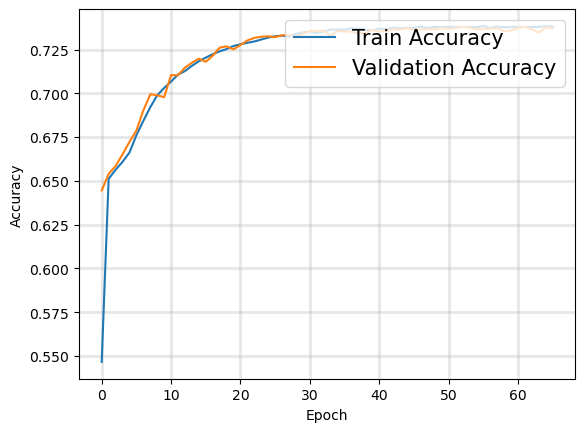

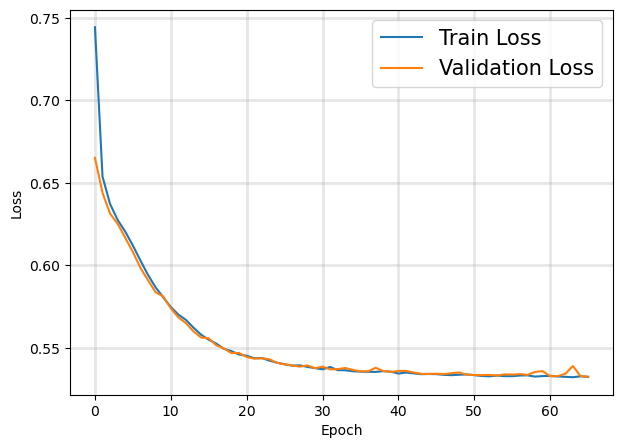

In [7]:
# plot accuracy

# plot both accuracy and val accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.0, 1.5])
plt.legend(loc='upper right',fontsize=15)
plt.grid('-',lw=2,alpha=0.3)
plt.savefig(pp,format='pdf')
# plot both loss and val loss
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.001, 10])
# plt.yscale('log')
plt.legend(loc='upper right',fontsize=15)
plt.grid('-',lw=2,alpha=0.3)
plt.savefig(pp,format='pdf')

# Task 8

Predict NN Score 

- plot nn score
- plot ROC

In [8]:
#Setup some new dataframes  t_df is testing, v_df is training (or validation)
t_df = pd.DataFrame()
v_df = pd.DataFrame()
t_df['train_truth'] = y_train.ravel()
t_df['train_prob'] = 0
v_df['test_truth'] = y_test.ravel()
v_df['test_prob'] = 0

# Now we evaluate the model on the test and train data by calling the
# predict function

val_pred_proba = model.predict(X_test)
train_pred_proba = model.predict(X_train)
t_df['train_prob'] = train_pred_proba
v_df['test_prob'] = val_pred_proba


3125/3125 [==============================] - 3s 814us/step


plotting nn score

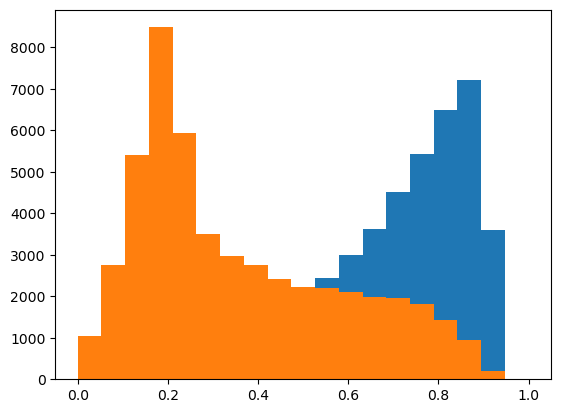

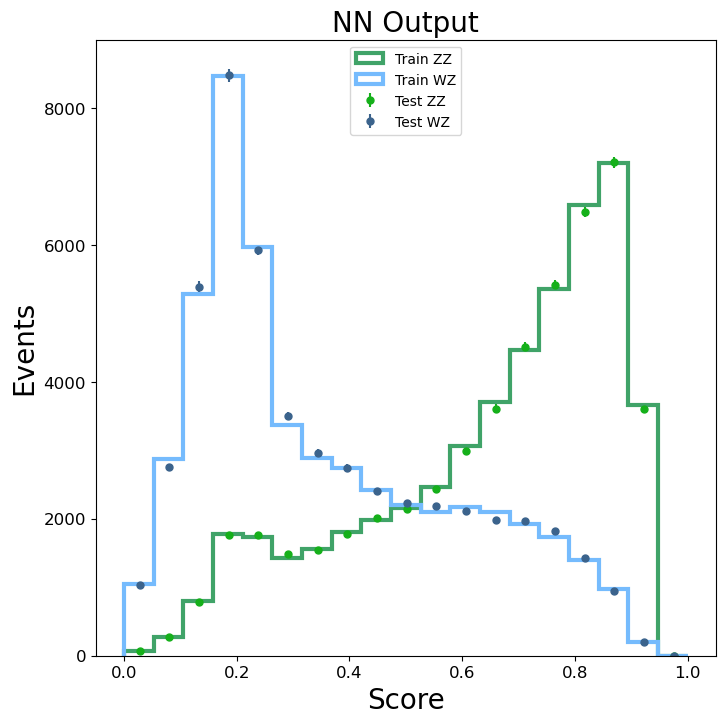

In [9]:
mybins = np.linspace(0,1,20)

# First we make histograms to plot the testing data as points with errors
testsig = plt.hist(v_df[v_df['test_truth']==1]['test_prob'],bins=mybins)
testsige = np.sqrt(testsig[0])
testbkg = plt.hist(v_df[v_df['test_truth']==0]['test_prob'],bins=mybins)
testbkge = np.sqrt(testbkg[0])


plt.figure(figsize=(8,8))
plt.errorbar(testsig[1][1:]-0.025, testsig[0], yerr=testsige, fmt='.', color="xkcd:green",label="Test ZZ", markersize='10')
plt.errorbar(testbkg[1][1:]-0.025, testbkg[0], yerr=testbkge, fmt='.', color="xkcd:denim",label="Test WZ", markersize='10')
plt.hist(t_df[t_df['train_truth']==1]['train_prob'],bins=mybins, histtype='step', label="Train ZZ", linewidth=3, color='xkcd:greenish',density=False,log=False)
plt.hist(t_df[t_df['train_truth']==0]['train_prob'],bins=mybins, histtype='step', label="Train WZ", linewidth=3, color='xkcd:sky blue',density=False,log=False)
plt.legend(loc='upper center')
plt.xlabel('Score',fontsize=20)
plt.ylabel('Events',fontsize=20)
plt.title(f'NN Output',fontsize=20)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('NNscore.png')
plt.savefig(pp,format='pdf')

##  Now you add code to plot the ROC curve

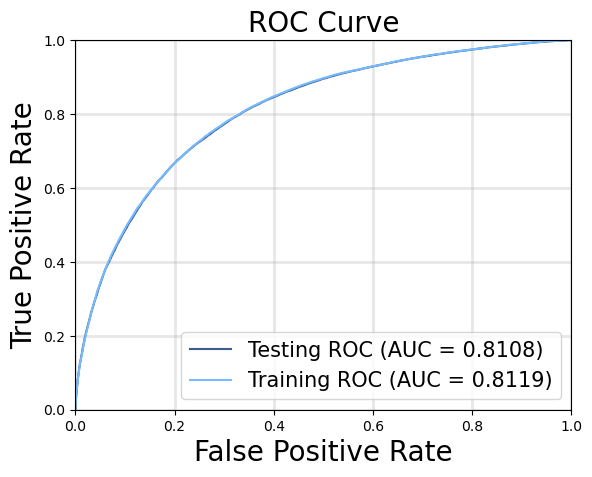

In [10]:
# ROC
fpr, tpr, _ = roc_curve(y_test,val_pred_proba)
auc_score = auc(fpr,tpr)
fpr1, tpr1, _ = roc_curve(y_train,train_pred_proba)
auc_score1 = auc(fpr1,tpr1)
plt.plot(fpr,tpr,color='xkcd:denim blue', label='Testing ROC (AUC = %0.4f)' % auc_score)
plt.plot(fpr1,tpr1,color='xkcd:sky blue', label='Training ROC (AUC = %0.4f)' % auc_score1)
plt.legend(loc='lower right',fontsize=15)
plt.title(f'ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlim(0.,1.)
plt.ylim(0.,1.)
plt.grid('-',lw=2,alpha=0.3)
#plt.savefig('ROC.png')
plt.savefig(pp,format='pdf')


In [11]:
 pp.close()
 print('All done')

All done
